In [79]:
# Explicação extra sobre Merge, Join e Concat com Pandas
# link: https://www.youtube.com/watch?v=TPivN7tpdwc&ab_channel=AlexTheAnalyst

'''
    - INNER JOIN
    - OUTER JOIN
    - LEFT JOIN
    - RIGHT JOIN
'''

import pandas as pd

In [80]:
df1 = pd.read_csv('../dataset/LOTR.csv')
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [81]:
df2 = pd.read_csv('../dataset/LOTR2.csv')
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [82]:
# INNER JOIN

df1.merge(df2, how = 'inner', on = 'FellowshipID', suffixes = ('_df1', '_df2'))

,FellowshipID,FirstName_df1,Skills,FirstName_df2,Age
0,1001,Frodo,Hiding,Frodo,50
1,1002,Samwise,Gardening,Samwise,39


In [83]:
# OUTER JOIN

df1.merge(df2, how = 'outer')

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [84]:
# LEFT JOIN

df1.merge(df2, how = 'left', on = 'FellowshipID')

,FellowshipID,FirstName_x,Skills,FirstName_y,Age
0,1001,Frodo,Hiding,Frodo,50.0
1,1002,Samwise,Gardening,Samwise,39.0
2,1003,Gandalf,Spells,NaN,NaN
3,1004,Pippin,Fireworks,NaN,NaN


In [85]:
# CROSS (JUNÇÃO CRUZADA) -> Ele pega cada ocorrência do df1 e compara com cada linha no df2

df1.merge(df2, how = 'cross')

,FellowshipID_x,FirstName_x,Skills,FellowshipID_y,FirstName_y,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1001,Frodo,Hiding,1002,Samwise,39
2,1001,Frodo,Hiding,1006,Legolas,2931
3,1001,Frodo,Hiding,1007,Elrond,6520
4,1001,Frodo,Hiding,1008,Barromir,51
5,1002,Samwise,Gardening,1001,Frodo,50
6,1002,Samwise,Gardening,1002,Samwise,39
7,1002,Samwise,Gardening,1006,Legolas,2931
8,1002,Samwise,Gardening,1007,Elrond,6520
9,1002,Samwise,Gardening,1008,Barromir,51


In [86]:
# Combining Data Using Pandas

import pandas as pd
import numpy as np

happiness2015 = pd.read_csv("../dataset/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("../dataset/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("../dataset/World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

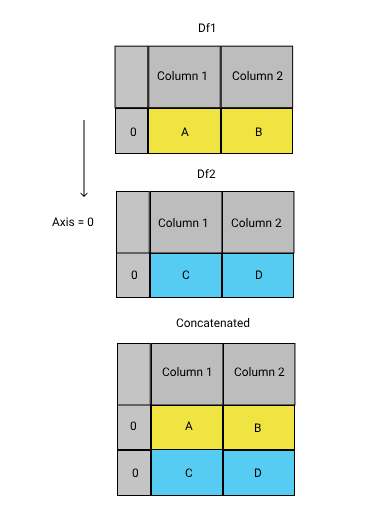

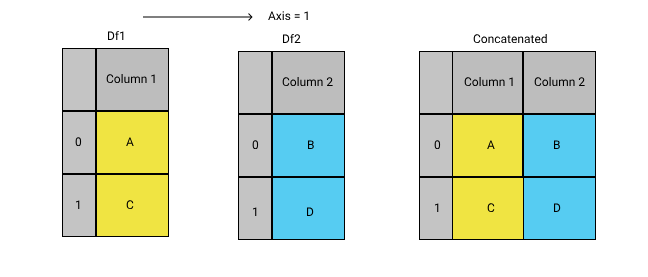

In [87]:
# Combining Dataframes with the Concat Function

head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)

question1 = concat_axis0.shape[0]
question2 = concat_axis1.shape[0]

print(question1, question2)

6 3


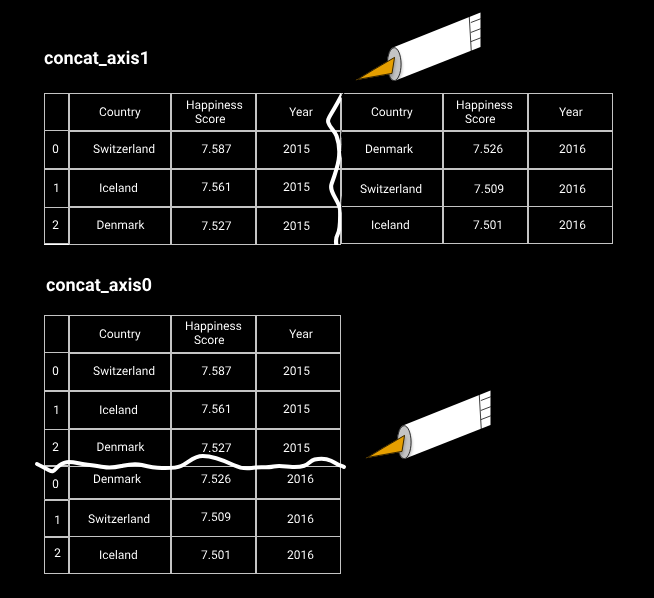

In [88]:
# Combining Dataframes with the Concat Function Continued

head_2015 = happiness2015[['Year', 'Country', 'Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)

rows = concat_axis0.shape[0]
columns = concat_axis0.shape[1]

print(rows, columns)

7 4


In [89]:
# Combining Dataframes with Different Shapes Using the Concat Function

head_2015 = happiness2015[['Year', 'Country', 'Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], ignore_index = True) # O Ignore-index reordena os valores de índice de maneira sequencial

concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


In [90]:
# Joining Dataframes with the Merge Function

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

three_2015.merge(three_2016, on = 'Country') # Método menos verboso

# Semelhante ao fazer -> merged = three_2015.merge(three_2015, three_2016, on = 'Country')

# O único país retornado em merged foi "Noruega" - o único elemento que apareceu na Country coluna em AMBOS three_2015 e three_2016.

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [91]:
# Joining on Columns with the Merge Function

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

print(three_2015)

merged_left = three_2015.merge(three_2016, on = 'Country', how = 'left')
merged_left_updated = three_2016.merge(three_2015, on = 'Country', how = 'left')

print(three_2016)
print(merged_left_updated)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


In [92]:
# Left Joins with the Merge Function

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged_suffixes = three_2015.merge(three_2016, on = 'Country', how = 'left', suffixes = ('_2015', '_2016'))
merged_updated_suffixes = three_2016.merge(three_2015, on = 'Country', how = 'left', suffixes = ('_2016', '_2015'))

print(merged_suffixes)
print(merged_updated_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN
   Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


In [93]:
# Join on Index with the Merge Function

four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

print(four_2015)
print(three_2016)

merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

rows = merge_index.shape[0]
columns = merge_index.shape[1]

merge_index_left = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'), how = 'left')

rows = merge_index_left.shape[0]
columns = merge_index_left.shape[1]


   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
5  Finland               6  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


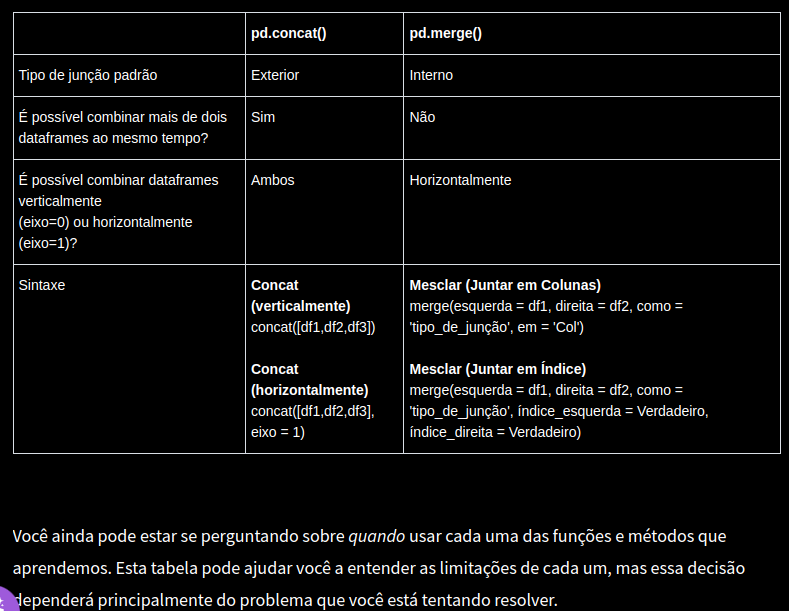

<Axes: title={'center': 'Mean Happiness Scores by Region'}, ylabel='Region'>

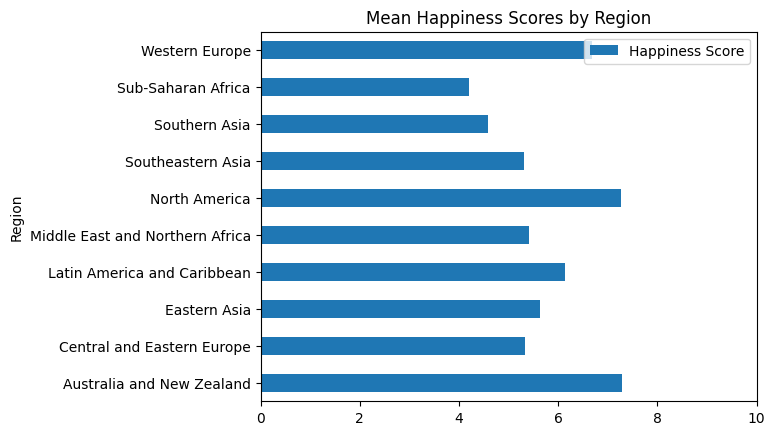

In [94]:
# Challenge: Combine Data and Create a Visualization

#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc='mean')

#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

In [95]:
# Renomeando o nome da coluna Happiness Score 

happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

In [96]:
# Usando PD concat para unificar os datasets

happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,...,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,...,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,...,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,...,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


In [102]:
# método para criar uma tabela dinâmica a partir do combined dataframe
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc = np.mean, margins=True)

/tmp/ipykernel_563/3859682335.py:2: FutureWarning: The provided callable <function mean at 0x7a807023bd80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc = np.mean, margins=True)


<Axes: title={'center': 'Mean Happiness Scores by Year'}, ylabel='Year'>

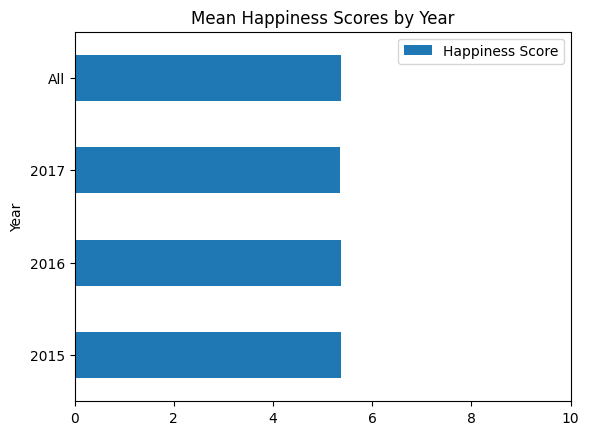

In [103]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))